# MATPLOTLIB ASSIGNMENT

In [7]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Scipy: 
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset  given below. 

### Task: 
#### 1.fitting it to the periodic function 
#### 2.plot the fit  
Data 

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


In [24]:
Months = np.arange(12)
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 ])
min_temp =np.array([ 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
Temperature = np.linspace(20,50,12)

Text(0, 0.5, 'Temperature')

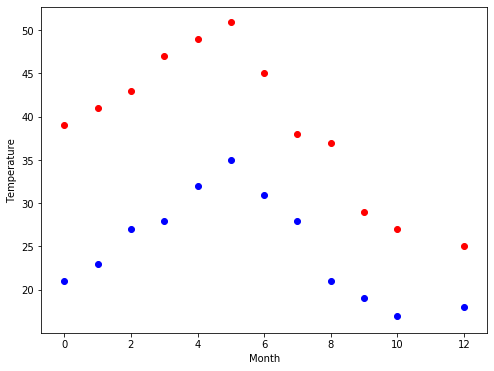

In [29]:
#plt.scatter(Month , Temprature)
plt.figure(figsize=(8,6))
plt.scatter(Month ,Max,c = "r")
plt.scatter(Month ,Min , c= "b" )
plt.xlabel("Month")
plt.ylabel("Temperature")

## 1.fitting it to the periodic function

In [30]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, Months, max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, Months, min_temp, [-40, 20, 0])

## 2.Plot the fit

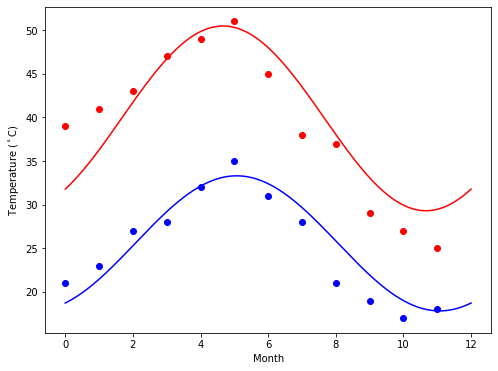

In [28]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(Months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(Months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## Matplotlib: 
This assignment is for visualization using matplotlib: 

data to use: 

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url) 

Charts to plot: 



#### 1. Create a pie chart presenting the male/female proportion 

In [10]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [11]:
titanic.head()
x = titanic["sex"]
Dummy = pd.get_dummies(x)
T = pd.concat((titanic , Dummy),axis = 1)
T1 = T.drop(["sex","male" ],axis = 1)
T1.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,female
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1.0,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [12]:
x = T1["female"]
Col = pd.Series(x, dtype=int)

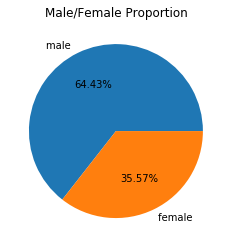

In [13]:
Total_female = sum(Col)
for i in Col.shape:
    row = i
    break
Total_male = abs(row - Total_female)
L = [Total_male , Total_female]
plt.title('Male/Female Proportion')
plt.pie(L,labels = [ "male ", "female "],autopct="%0.2f%%")
plt.show()

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 

Text(0, 0.5, 'Age')

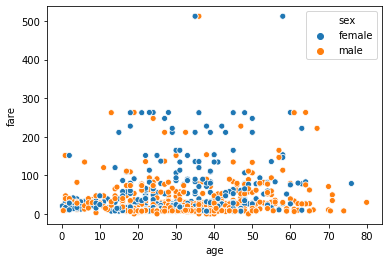

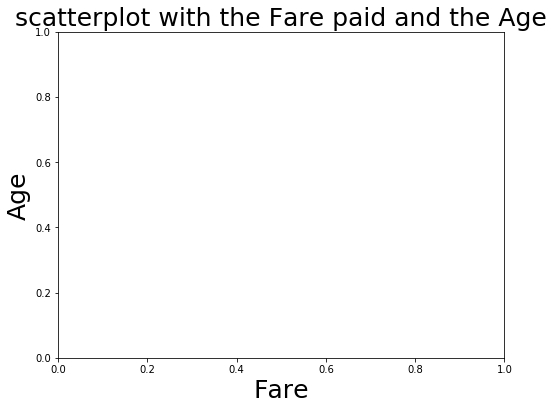

In [15]:
sns.scatterplot(y=titanic["fare"], x=titanic["age"], hue=titanic["sex"])
plt.figure(figsize=(8,6))
plt.title('scatterplot with the Fare paid and the Age',fontsize=25)
plt.xlabel('Fare',fontsize=25)
plt.ylabel('Age',fontsize=25)